# Exploring Histograms and Box Plots: Similarities and Differences –  Continuous Improvement Toolkit
The "Orders_by_Products.csv" dataset provides a detailed record of sales transactions for a hypothetical retail store, which we can refer to as "Bundle Store". This dataset is a valuable resource for understanding the store's operations, customer preferences, and financial performance.

Each row in the dataset represents an individual order placed by a customer, encompassing a wide range of products across various categories and sub-categories.

Answer All the Questions:

Question 1: Measures of Central Tendency

Question 2: Measures of Dispersion

Question 3: Histogram and Boxplot

Question 4: Covariance and Correlation

In [ ]:
orders <- read.csv("Orders_by_Products.csv")


In [ ]:
head(orders)

,order_id,order_date,ship_date,ship_mode,customer_id,product_id,sales,quantity,discount,profit,⋯,category,sub_category,description,unit_cost,days_to_ship,order_year,order_month_no,order_day,order_day_name,margin_category
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,ID-2022-83625,28/7/2022,31/7/2022,Second Class,RS-19420,FUR-BO-10000008,465.1560,2,0.4000000,-255.8640,⋯,Furniture,Bookcases,"Sauder Library with Doors, Traditional",360.51,3,2022,7,3,Thursday,Low
2,IN-2020-85480,31/7/2020,08/2/2020,First Class,CS-12490,FUR-BO-10000021,243.0600,2,0.1498468,102.0600,⋯,Furniture,Bookcases,"Dania Corner Shelving, Metal",70.50,-174,2020,7,4,Friday,High
3,IN-2020-21206,02/7/2020,02/12/2020,Standard Class,SC-20800,FUR-BO-10000035,1236.3300,3,0.0000000,519.2100,⋯,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,153,2020,7,3,Thursday,High
4,IN-2019-50060,09/7/2019,14/9/2019,Standard Class,MC-17575,FUR-BO-10000035,2472.6600,6,0.1498468,1038.4200,⋯,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,67,2019,7,1,Tuesday,High
5,IN-2019-25889,12/8/2019,12/12/2019,Standard Class,BP-11185,FUR-BO-10000035,2596.2930,7,0.1000000,923.0130,⋯,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,122,2019,8,0,Monday,High
6,IN-2022-23894,04/2/2022,04/5/2022,Second Class,LP-17095,FUR-BO-10000035,766.5246,2,0.0700000,288.4446,⋯,Furniture,Bookcases,"Dania Classic Bookcase, Pine",239.04,89,2022,2,4,Friday,High


In [ ]:
str(orders)

'data.frame':	10923 obs. of  21 variables:
 $ order_id       : chr  "ID-2022-83625" "IN-2020-85480" "IN-2020-21206" "IN-2019-50060" ...
 $ order_date     : chr  "28/7/2022" "31/7/2020" "02/7/2020" "09/7/2019" ...
 $ ship_date      : chr  "31/7/2022" "08/2/2020" "02/12/2020" "14/9/2019" ...
 $ ship_mode      : chr  "Second Class" "First Class" "Standard Class" "Standard Class" ...
 $ customer_id    : chr  "RS-19420" "CS-12490" "SC-20800" "MC-17575" ...
 $ product_id     : chr  "FUR-BO-10000008" "FUR-BO-10000021" "FUR-BO-10000035" "FUR-BO-10000035" ...
 $ sales          : num  465 243 1236 2473 2596 ...
 $ quantity       : int  2 2 3 6 7 2 3 2 3 5 ...
 $ discount       : num  0.4 0.15 0 0.15 0.1 ...
 $ profit         : num  -256 102 519 1038 923 ...
 $ profit_margin  : num  -0.55 0.42 0.42 0.42 0.356 ...
 $ category       : chr  "Furniture" "Furniture" "Furniture" "Furniture" ...
 $ sub_category   : chr  "Bookcases" "Bookcases" "Bookcases" "Bookcases" ...
 $ description    : chr  "Sauder

# **1. Measures of Central Tendency**

In [ ]:
# Mean sales amount
mean_sales <- mean(orders$sales, na.rm = TRUE)

# Median quantity of products ordered
median_quantity <- median(orders$quantity, na.rm = TRUE)

# Mode of shipping mode
mode_ship_mode <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
mode_ship_mode <- mode_ship_mode(orders$ship_mode)

mean_sales
median_quantity
mode_ship_mode



[1] 326.0639

[1] 3

[1] "Standard Class"



1.   **Mean Sales Amount: 326.063854984894**

This value represents the average sales amount per order. On average, each order in the dataset has a sales amount of approximately $326.06. This indicates the typical revenue generated from a single order in the dataset.

2.   **Median Quantity: 3**

The median quantity of products ordered is 3. This means that half of the orders in the dataset involve purchasing three or fewer items, while the other half involves purchasing more than three items. The median provides a sense of the typical order size in terms of quantity.

3. **Mode of Shipping Mode: 'Standard Class'**

The most common shipping mode used for orders is 'Standard Class.' This indicates that the majority of orders in the dataset are shipped using the standard shipping option, which might be due to a balance of cost and delivery time that appeals to most customers.


# **2. Measures of Dispersion**

In [ ]:
# Range of profit
profit_range <- range(orders$profit, na.rm = TRUE)

# Variance and Standard Deviation of discount
discount_variance <- var(orders$discount, na.rm = TRUE)
discount_sd <- sd(orders$discount, na.rm = TRUE)

profit_range
discount_variance
discount_sd

[1] -3009.435  2939.310

[1] 0.03111956

[1] 0.1764074



1.   **Range of Profit: [-3009.43, 2939.31]**

This range indicates that the lowest profit recorded in the dataset is -$3009.43, which suggests a significant loss on some orders. The highest profit is $2939.31, indicating that some orders were highly profitable. The wide range suggests a high variability in the profitability of different orders.

2.   **Variance of Discount: 0.0311195608967349**

The variance of discount is approximately 0.0311. This value indicates the degree to which the discounts applied to orders vary from the average discount. A smaller variance suggests that most discounts are similar in size, while a larger variance indicates a greater diversity in the discounts offered.

3. **Standard Deviation of Discount: 0.176407372002235**

The standard deviation of discount is approximately 0.1764. This value provides a measure of the average deviation of discounts from the mean. Like the variance, a smaller standard deviation indicates that the discounts are relatively consistent, while a larger standard deviation suggests a wider spread of discount values.



# **3. Histogram and Boxplot**

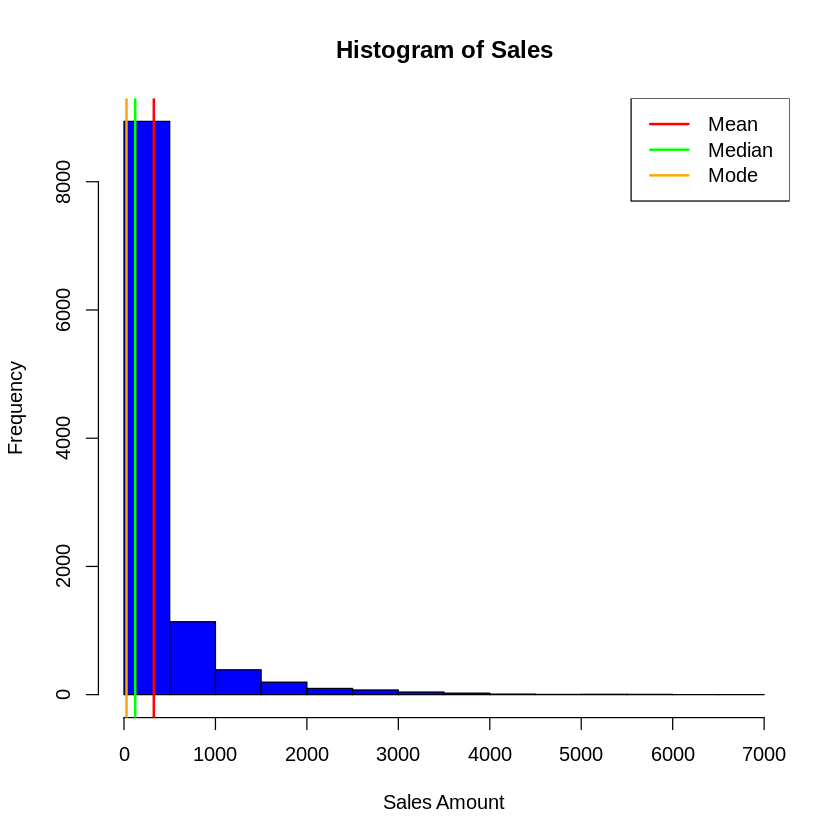

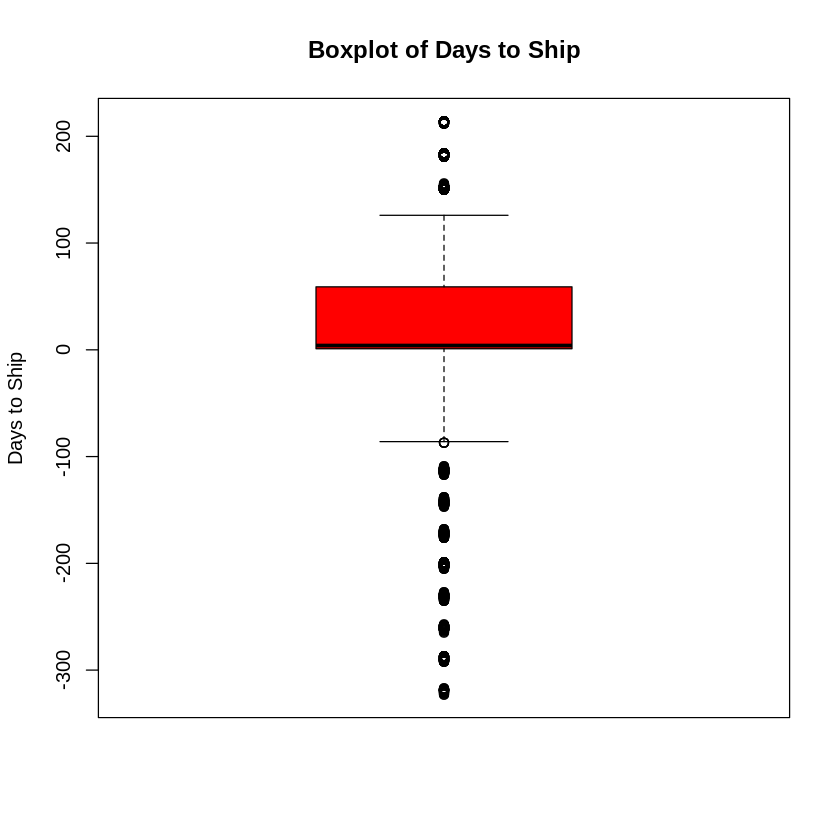

In [ ]:
# Calculate mean, median, and mode
mean_sales <- mean(orders$sales, na.rm = TRUE)
median_sales <- median(orders$sales, na.rm = TRUE)
mode_sales <- function(x) {
  ux <- unique(x)
  ux[which.max(tabulate(match(x, ux)))]
}
mode_sales <- mode_sales(orders$sales)

# Histogram for sales amount
hist(orders$sales, main = "Histogram of Sales", xlab = "Sales Amount", col = "blue", xlim = c(0, max(orders$sales)))
abline(v = mean_sales, col = "red", lwd = 2)
abline(v = median_sales, col = "green", lwd = 2)
abline(v = mode_sales, col = "orange", lwd = 2)
legend("topright", legend = c("Mean", "Median", "Mode"), col = c("red", "green", "orange"), lwd = 2)

# Boxplot for days to ship
boxplot(orders$days_to_ship, main = "Boxplot of Days to Ship", ylab = "Days to Ship", col = "red")




1.   **Histogram**

**Skewed Distribution:** The histogram shows that the distribution of sales amounts is highly right-skewed, meaning there are a large number of orders with smaller sales amounts and a few orders with very high sales amounts.

**Central Tendency Lines:** The lines for mean (red), median (green), and mode (orange) are very close to each other and located toward the lower end of the sales amount scale. This indicates that the typical sales amount is on the lower side of the overall range.

**Mean vs. Median vs. Mode:** The mean appears to be slightly higher than the median and mode, which is consistent with a right-skewed distribution. This suggests that the mean is being pulled up by high-value orders. Since the median is less affected by extreme values, its position closer to the mode indicates that more than half of the orders have sales amounts less than the mean.

**High Frequency of Low Sales Values:** The tallest bar corresponds to the interval containing the mode, showing that the most common sales amount is quite low relative to the rest of the data.

**Low Frequency of High Sales Values:** There are very few orders with high sales amounts, as indicated by the low height of bars further to the right.

Overall, the sales data is concentrated at the lower end, with relatively few large transactions. This pattern is typical in many sales datasets, where a large number of small transactions and a small number of large transactions occur.

2.   **Boxplot**

**Median:** The line within the box indicates the median of the data, which appears to be slightly above 0. This suggests that the median shipping time is very short.

**Interquartile Range (IQR):** The length of the box represents the IQR, the middle 50% of the data. Since the box is small and positioned above 0, most orders are shipped within a short time frame after the order date.

**Outliers:** The individual points above and below the "whiskers" are considered outliers. They represent days to ship that are significantly higher or lower than the rest of the data. The presence of many outliers below the box indicates numerous instances where the ship date is significantly before the order date, which could be due to data entry errors or orders being backdated for some reason.

**Range:** The "whiskers" extend from the quartiles to the furthest data point within 1.5 times the IQR. However, in this case, there are outliers that are beyond this range, and the whiskers only extend to a certain point above and below the box.

**Negative Values:** The presence of negative values for days to ship is unusual and suggests that for many orders, the ship date is recorded as occurring before the order date, which may point to issues with the data that warrant further investigation.

In summary, while most orders seem to ship in a timely fashion, the significant number of negative values suggests potential data quality issues that should be addressed. The outliers above the box indicate that there are also some orders taking much longer to ship than the majority.




# **4. Covariance and correlation**

In [ ]:
# Covariance and Correlation between sales and profit
covariance_sales_profit <- cov(orders$sales, orders$profit, use = "complete.obs")
correlation_sales_profit <- cor(orders$sales, orders$profit, use = "complete.obs")

# Correlation between discount and quantity
correlation_discount_quantity <- cor(orders$discount, orders$quantity, use = "complete.obs")

covariance_sales_profit
correlation_sales_profit
correlation_discount_quantity

[1] 49296.39

[1] 0.5236739

[1] -0.009369722



1.   **Covariance between sales and profit**

This large positive covariance value suggests a strong positive relationship between the two variables being analyzed. This implies that as one variable increases, the other variable tends to also increase, and vice versa.

2.   **Correlation (between sales and profit): 0.523673926932454**

The correlation coefficient of approximately 0.524 indicates a moderate positive linear relationship between the sales and profit variables. This means that as sales increase, profit tends to increase as well, but not perfectly so. A value of 1 would indicate a perfect positive linear relationship, while a value of 0 would indicate no linear relationship.

3. **Correlation (between discount and quantity)**

The correlation coefficient of approximately -0.009 indicates that there is virtually no linear relationship between the discount given and the quantity of products sold. This value is very close to 0, suggesting that changes in the discount do not reliably predict changes in the quantity purchased in either direction (neither increasing nor decreasing).

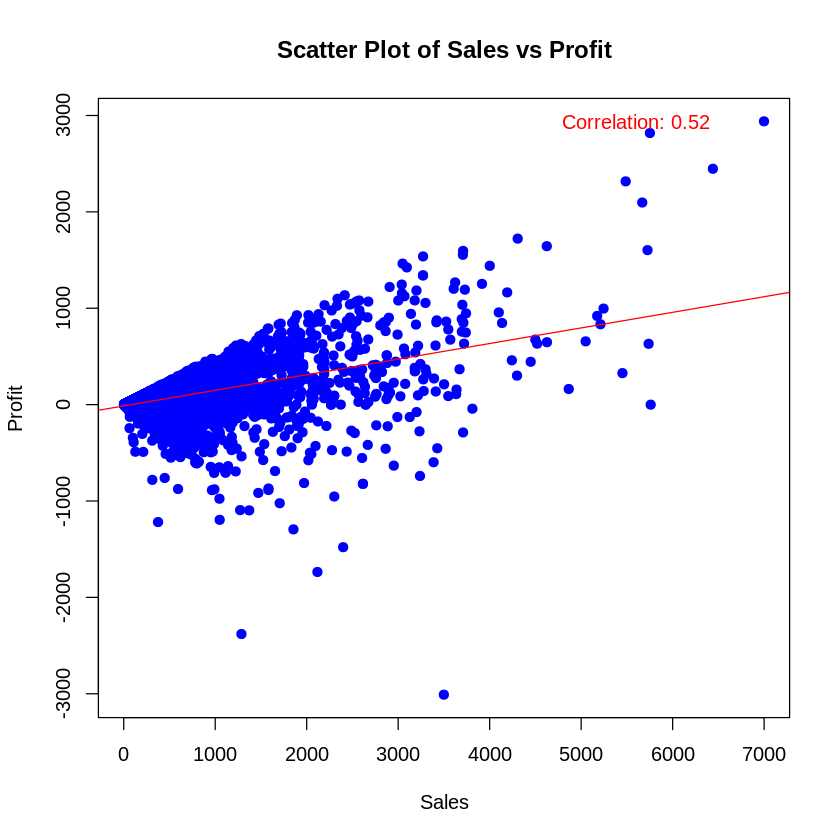

In [ ]:
# Scatter plot for correlation between sales and profit
plot(orders$sales, orders$profit, main = "Scatter Plot of Sales vs Profit", xlab = "Sales", ylab = "Profit", pch = 19, col = "blue")
abline(lm(orders$profit ~ orders$sales), col = "red") # Add regression line
text(x = max(orders$sales) * 0.8, y = max(orders$profit), labels = paste("Correlation:", round(correlation_sales_profit, 2)), col = "red")





*   **Positive Linear Relationship**: The trend line in red shows a positive slope, meaning that as sales increase, profits also tend to increase. This relationship is supported by the positive correlation coefficient.

*   **Correlation Strength:** The correlation of 0.52 suggests a moderate positive relationship between sales and profit. While there is a tendency for higher sales to be associated with higher profit, the relationship is not very strong. There are many data points spread widely around the trend line, which indicates considerable variability that is not explained by sales alone.

*   **Profit Variability:** The spread of data points, especially in the mid-range of sales, suggests that there is variability in profit that cannot be accounted for just by looking at sales. This could be due to various factors like cost of goods sold, discounts, and operational efficiency.

*   **Losses**: There are several data points where the profit is negative, even for some orders with higher sales amounts. This indicates that some sales transactions result in a loss.

*   **Outliers:** There are outliers on both the sales and profit axes. Some orders have very high sales with relatively moderate profit, and some orders show profit that is significantly high or significantly negative relative to the bulk of the data. These could represent special cases or unusual transactions.






